[Subba Reddy Yeruva](https://in.linkedin.com/in/subba-reddy-yeruva-2a5618b0) - *71610085* 

In [372]:
import os
os.getcwd()

os.chdir('J:\\ISB Business Analytics\\Data Mining 2\\Home Work Datasets 1\\IRIS')

path = os.getcwd()
os.getcwd()

'J:\\ISB Business Analytics\\Data Mining 2\\Home Work Datasets 1\\IRIS'

In [373]:
# libraries 
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns

import copy

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder


# P1 : IRIS – HIERARCHICAL FISHER

In [374]:
#Loading the data and details of the data
data_path = "J:/ISB Business Analytics/Data Mining 2/Home Work Datasets 1/IRIS/"
train = pd.read_csv(data_path + "train.csv")
test = pd.read_csv(data_path + "test.csv")

#Details of the data
print ("The Train Data Details:- ")
print (train.head())
print ("                        ")
print ("The Test Data Details:- ")
print (test.head())

The Train Data Details:- 
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa
                        
The Test Data Details:- 
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           7           4.6          3.4           1.4          0.3  setosa
1           8           5.0          3.4           1.5          0.2  setosa
2           9           4.4          2.9           1.4          0.2  setosa
3          10           4.9          3.1           1.5          0.1  setosa
4          16           5.7          4.4           1.5          0.4  setosa


In [375]:
#remove the unnamed: 0 column
train = train.ix[0:, 1:]
test  = test.ix[0:, 1:]

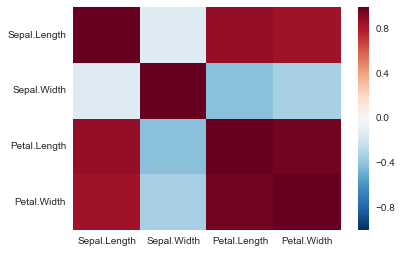

In [376]:
#Correlation matrix
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [377]:
train_row_cnt, train_col_cnt = train.shape

print ("The total number of training data columns is {}.".format(train_col_cnt))
print ("The total number of training data rows is {}.".format(train_row_cnt))
print ("      ")

train_cols = train.columns
print ("The training data column name :-")
print(train_cols)
print ("      ")

#Health check for classification of species
print ("Different species :-")
print(pd.value_counts(train['Species']))

The total number of training data columns is 5.
The total number of training data rows is 77.
      
The training data column name :-
Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
      
Different species :-
setosa        29
versicolor    28
virginica     20
Name: Species, dtype: int64


C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


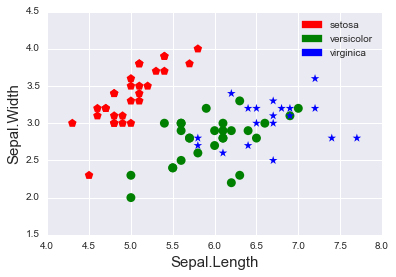

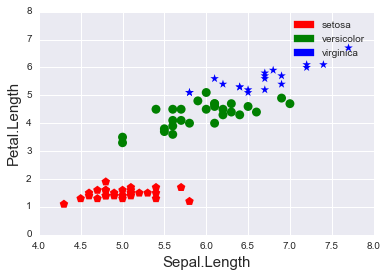

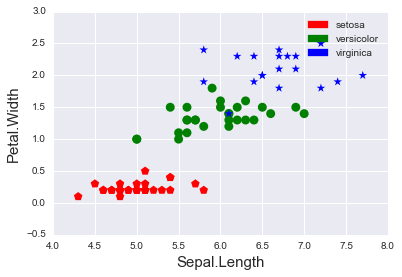

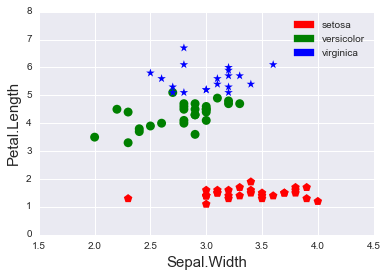

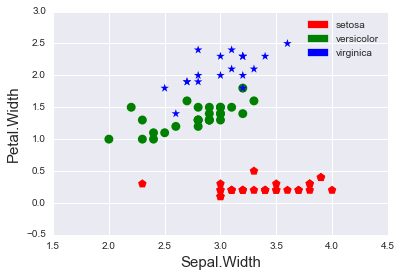

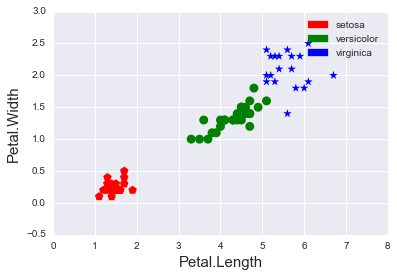

In [378]:
#the lengths are given in 4 columns and 5th column is label. So here the loop should be iterated for 4 times. 
#As per the indexing(starts from 0) of python to avoid the label 2 should be subtracted from total column count.
#First loop to start from first column
for i in range(0,train_col_cnt-2):
    i_plus = i + 1
    # Second loop to iterate from the 2nd column to 4th column, which will pair the features for scatter plot
    for j in range(i_plus,train_col_cnt-1):
        # To generate new picture the below command is required
        plt.figure()
        # Third loop to iterate through the rows. Assign the color and markers as per the label of the day.     
        for k in range(0,train_row_cnt-1):
            x, y = [train.ix[k,i], train.ix[k,j]]
            scale = 80.0
            # determine color
            flower = train.ix[k,train_col_cnt-1]
            # the variables color and mark are used to assign the color and marker to the corordinates.
            color = ""
            mark =  " "
            if flower == "setosa":
                color = "red"
                mark = "p"
            elif flower == "versicolor":
                color = "green"
                mark = "o"
            elif flower == "virginica":
                color = "blue"
                mark = "*"
            
            plt.scatter(x, y, s=scale, c=color, marker=mark, alpha=1, edgecolor="none")
    
        # Legend
        red_patch = mpatches.Patch(color='red', label='setosa')
        green_patch = mpatches.Patch(color='green', label='versicolor')
        blue_patch = mpatches.Patch(color='blue', label='virginica')
        plt.legend(handles=[red_patch, green_patch, blue_patch])

        #plt.title("The Iris Data Set", fontsize=18)
        plt.xlabel(train_cols[i], fontsize=15)
        plt.ylabel(train_cols[j], fontsize=15)

        plt.legend()
        plt.grid(True)

        plt.show()

# P 1.1 Scatter Plots and Inference

1. In all the scatter plots above "setosa" is clearly distinguishable from other two species "versicolor" and "virginica".
2. From Above it can be infered that the species "versicolor" and "virginica" are similar.


# P 1.2 Meta-class combining "versicolor" and "virginica"

Lets create a “meta-class” combining class 1 and class 2 (or whichever are the two most similar classes). Lets call it class 4.

In [379]:
train_meta_class = copy.deepcopy(train)
train_meta_class.loc[((train_meta_class['Species'] == 'versicolor') | (train_meta_class['Species'] == 'virginica')),
          'Species']='class 4'
#Health check for classification of species
print ("Different species :-")
print(pd.value_counts(train_meta_class['Species']))
print ("      ")

print ("Details of modified data set :-")
print(train_meta_class.head())
print(train_meta_class.tail())

Different species :-
class 4    48
setosa     29
Name: Species, dtype: int64
      
Details of modified data set :-
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
72           6.8          3.2           5.9          2.3  class 4
73           6.7          3.0           5.2          2.3  class 4
74           6.5          3.0           5.2          2.0  class 4
75           6.2          3.4           5.4          2.3  class 4
76           5.9          3.0           5.1          1.8  class 4


1. The actual data classification stats are as below:                          
    setosa        :29,                                                                                                             
    versicolor    :28,       
    virginica     :20 
2. After combining identical species the classification stats are as below:                
    class 4       :48,                          
    setosa        :29
3. Note:  There is no change in the count of "setosa" species in the dataset, hence it can be infered that the data modification is correct.  

# P 1.3 First Fisher discriminate

Create the first Fisher projection by trying to discriminate class 3 (the
different class) from class 4 (the meta-class).
¤ Do this on training data only

References :                                                 
https://en.wikipedia.org/wiki/Linear_discriminant_analysis                          
                                 
http://eminer.pythonanywhere.com/fishers-linear-discriminant-analysis/                               

http://eminer.pythonanywhere.com/implementing-fishers-lda-in-python/

In [380]:
def ByClass(dataset):        #separate data by clas

    classes = np.unique(dataset[:,-1])
    div_class = {}
    for i in classes:
        div_class[i] = dataset[dataset[:,-1] == i]

    return div_class

def Mean(data):
    mean = data.mean(axis = 0)
    
    return mean

Vector =  [[ 0.03436453]
 [ 0.15702405]
 [-0.15843383]
 [-0.03931312]]
Fisher discriminant value =  0.146383292514


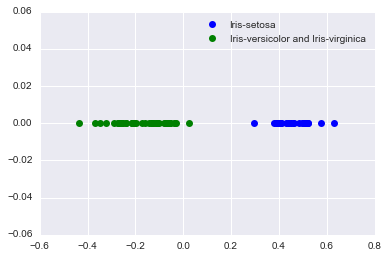

In [381]:
def LoadFile(filename):        #load input file containing training data
    dataset =[]
    dataset = filename
    dataset.loc[((dataset['Species'] == 'class 4') ),
          'Species']='2'
    dataset.loc[((dataset['Species'] == 'setosa') ),
          'Species']='1'
    
    dataset = np.array(dataset).astype(np.float64)
    return dataset


def Threshold(vector, data1, data2):
    mu1 = Mean(np.dot(vector, data1.T))
    mu2 = Mean(np.dot(vector, data2.T))
    #print (mu1, mu2)
    print ("Fisher discriminant value = ",(mu1+mu2)/2)
    return (mu1+mu2)/2, mu1, mu2
#def Projection1D()    
def main(dataset):        #assuming given two class problem
    div_data = ByClass(dataset)
    class1, class2 = div_data
    class1_data, class2_data = div_data[class1], div_data[class2] 
    class1_data = class1_data[:,:-1]
             #removing the class labels from the data as they are not required to calculate mean
    class2_data = class2_data[:,:-1]
    mean1 = Mean(class1_data)
    mean2 = Mean(class2_data)
    mean = Mean(dataset[:,:-1])
    mean1, mean2, mean = mean1.T, mean2.T, mean.T

    m,n = class1_data.shape
    diff1 = class1_data - np.array(list(mean1)*m).reshape(m,n)

    m,n = class2_data.shape
    diff2 = class2_data - np.array(list(mean2)*m).reshape(m,n)

    diff = np.concatenate([diff1, diff2])
    m, n = diff.shape

    withinClass = np.zeros((n,n))
    diff = np.matrix(diff)

    for i in range(m):
        withinClass += np.dot(diff[i,:].T, diff[i,:])

    opt_dir_vector = np.dot(np.linalg.inv(withinClass), (mean1 - mean2))
    print ('Vector = ', np.matrix(opt_dir_vector).T)

    threshold = Threshold(opt_dir_vector, class1_data, class2_data)

    #print ('Threshold = ', threshold, 'm1 = ', class1_data, 'm2 = ', class2_data)
    #print ('Threshold = ', threshold)
    #projection of classes on 1D space
    x1 = np.dot(class1_data, opt_dir_vector)
    y1 = np.array([0]*class1_data.shape[0])
    x2 = np.dot(class2_data, opt_dir_vector)
    y2 = np.array([0]*class2_data.shape[0])
    #print("vect shape:",opt_dir_vector.shape )
    #print("x 1 shape:",x1.shape )
    #print("y 1 shape:",y1.shape )
    #print("x 2 shape:",x2.shape )
    #print("y 2 shape:",y2.shape )
    
    plt.plot(x1,y1, "bo", label="Iris-setosa")
    plt.plot(x2,y2, "go", label="Iris-versicolor and Iris-virginica")
    plt.legend()
    
if __name__ == '__main__':    
    
    filename = []
    filename = copy.deepcopy(train_meta_class)

    dataset = LoadFile(filename)

    main(dataset)

1. From above the first fisher projection vector deatails are as below.                               
 [ 0.03436453]                               
 [ 0.15702405]                                
 [-0.15843383]                                   
 [-0.03931312]   
2. Fisher Discriminant Value is 0.146383292514

# P 1.4 Second Fisher discriminate

Create the second Fisher projection by trying to discriminate class 1 from class 2 (the original two similar classes).            
¤ Do this on training data only

Vector =  [[ 0.06134601]
 [ 0.16986251]
 [-0.16487636]
 [-0.35677647]]
Fisher discriminant value =  -0.546254365046


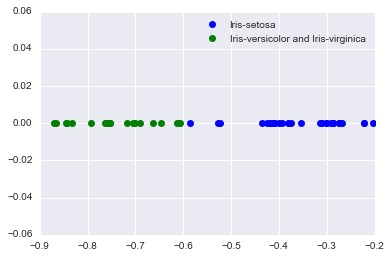

In [382]:
def LoadFile2(filename):        #load input file containing training data
    dataset =[]
    dataset = filename
    dataset.loc[((dataset['Species'] == 'versicolor') ),
          'Species']='1'
    dataset.loc[((dataset['Species'] == 'virginica') ),
          'Species']='2'
    
    dataset = np.array(dataset).astype(np.float64)
    return dataset

if __name__ == '__main__':    
    filename = []
    filename = copy.deepcopy(train)
    #print("diff spec", pd.value_counts(filename['Species']))
    
    filename = filename[filename.Species != "setosa"]
    
    #print("input shape : ", filename.shape)
    #print("diff spec", pd.value_counts(filename['Species']))
    #print(filename.head())
    
    dataset = LoadFile2(filename)

    main(dataset)

1. From above the first fisher projection vector deatails are as below.                               
 [ 0.06134601]                 
 [ 0.16986251]             
 [-0.16487636]              
 [-0.35677647]                     
2. Fisher Discriminant Value is -0.546254365046

# P 1.5 Projection Of entire data

Now project the entire data in these two projections and color code the
class points.
¤ Do this on test data only.

References:         
http://sebastianraschka.com/Articles/2014_python_lda.html

In [383]:
X = test.ix[0:,:4]
y = test.ix[0:,4:]

# converting into array
y = np.ravel(y, order='C')

# Label encoding 
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [384]:
#Linear discriminant analysis through scikit learn
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

#a = X_lda_sklearn.trace
#print(a)
sklearn_lda.coef_
#sklearn_lda.tol

sklearn_lda.n_components

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


2

In [385]:
#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

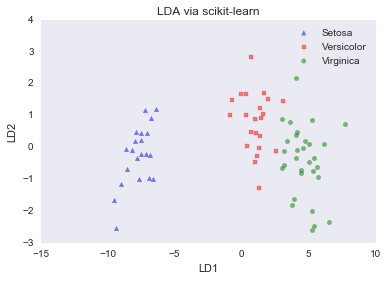

In [386]:
plot_scikit_lda(X_lda_sklearn, title='LDA via scikit-learn')

# P 1.6 Observations on Fisher Discriminant

It is evident from the results that Setosa is clearly distinguishable from Versicolor and Virginica. 
Versicolor and Virginica are not clearly seperable but after the fisher discriminat they are seperated with less value.

# P2 : MUSHROOM information gain

In [387]:
#Loading the data and details of the data
data_path = "J:/ISB Business Analytics/Data Mining 2/Home Work Datasets 1/Mushroom/"
train_mushroom = pd.read_csv(data_path + "train.csv")
test_mushroom = pd.read_csv(data_path + "test.csv")

#Details of the data
print ("The Train Data Details:- ")
print (train_mushroom.head())
print ("                        ")
print ("The Test Data Details:- ")
print (test_mushroom.head())

#remove the unnamed: 0 column
train_mushroom = train_mushroom.ix[0:, 1:]
test_mushroom  = test_mushroom.ix[0:, 1:]

The Train Data Details:- 
   Unnamed: 0 V1 V2 V3 V4 V5 V6 V7 V8 V9 ... V14 V15 V16 V17 V18 V19 V20 V21  \
0           1  p  x  s  n  t  p  f  c  n ...   s   w   w   p   w   o   p   k   
1           2  e  x  s  y  t  a  f  c  b ...   s   w   w   p   w   o   p   n   
2           3  e  b  s  w  t  l  f  c  b ...   s   w   w   p   w   o   p   n   
3           4  p  x  y  w  t  p  f  c  n ...   s   w   w   p   w   o   p   k   
4           5  e  x  s  g  f  n  f  w  b ...   s   w   w   p   w   o   e   n   

  V22 V23  
0   s   u  
1   n   g  
2   n   m  
3   s   u  
4   a   g  

[5 rows x 24 columns]
                        
The Test Data Details:- 
   Unnamed: 0 V1 V2 V3 V4 V5 V6 V7 V8 V9 ... V14 V15 V16 V17 V18 V19 V20 V21  \
0           7  e  b  s  w  t  a  f  c  b ...   s   w   w   p   w   o   p   k   
1           8  e  b  y  w  t  l  f  c  b ...   s   w   w   p   w   o   p   n   
2           9  p  x  y  w  t  p  f  c  n ...   s   w   w   p   w   o   p   k   
3          10  e  b  s  y  t

In [388]:
train_mushroom.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [389]:
trainnull = train_mushroom.isnull()
trainnull_pcto = trainnull.apply(pd.value_counts).fillna(0)
trainnull_pcto = trainnull_pcto.T
#print(result)
trainnull_pcto = trainnull_pcto.div(len(train_mushroom),axis=1)
trainnull_pct = trainnull_pcto.mul(100,axis=1)
print ("Note: Here False will indicate the value is present and True will indicate that the value is not present.")
print ("      The values are shown in percentages.")
print(trainnull_pct)

Note: Here False will indicate the value is present and True will indicate that the value is not present.
      The values are shown in percentages.
     False
V1   100.0
V2   100.0
V3   100.0
V4   100.0
V5   100.0
V6   100.0
V7   100.0
V8   100.0
V9   100.0
V10  100.0
V11  100.0
V12  100.0
V13  100.0
V14  100.0
V15  100.0
V16  100.0
V17  100.0
V18  100.0
V19  100.0
V20  100.0
V21  100.0
V22  100.0
V23  100.0


In [390]:
row, col = train_mushroom.shape
row

4877

In [391]:
# Claculating the entropy
v1 = pd.value_counts(train_mushroom['V1'])

entro = []
entropy_before = 0

length1 = len(v1) 

for i in range(0,length1):
    
    entro.append(v1[i]/row)
    
    e = entro[i] * math.log(entro[i],2)
    e= e*(-1)
    
    entropy_before += e

print(entropy_before)

0.998984118223


In [392]:
# column names 
train_cols = train_mushroom.columns
# Creating empty dataframe for storing the measured values
measurement_info = pd.DataFrame()
col_names = ['Feature_name','Accuracy','GINI index','1- Entropy','Information Gain']
measurement_info = pd.DataFrame( columns=col_names)

# appending the dataframe is inefficient, so create list of dictionaries and assing 
#the list of dictionary to dataframe out of the loop
measr_list_dict = []

# Process to calcualte the measurements
for i in range(1,col):
    # Processing feature/column name 
    print("Feature name: ", train_cols[i])
    
    # Feature stats, i.e., unique values count of the respective feature
    uniq_count = pd.DataFrame({'count' : train_mushroom.groupby( train_cols[i] ).size()}).reset_index()
    print("Unique values count: ", uniq_count)
    
    # group by respective feature and response variable. The counters will be used in entropy calculation of each feature
    xyz = pd.DataFrame({'count' : train_mushroom.groupby( [ train_cols[i],'V1'] ).size()}).reset_index()
    
    # adding count variable
    xyz['total_count'] = 0
    length1 = len(uniq_count)
    for j in range(0,length1):
        xyz.loc[(xyz[train_cols[i]]==uniq_count[train_cols[i]][j]),'total_count']=uniq_count['count'][j]
    
    #****  Accuracy Calculation  **** 
    prob = []
    for k in range(0,len(uniq_count)):
        prob.append(uniq_count['count'][k]/row)
    
    # "Max value element : ", max(list1)
    accuracy = max(prob)
    
    # Entropy, 1 - entropy, gini index and information gain calculation
    entro = []
    entropy = 0
    one_minus_entropy = 0
    info_gain = 0
    gini_measr = 0
    length1 = len(xyz) 
    for l in range(0,length1):
    
        entro.append(xyz['count'][l]/xyz['total_count'][l])
        ## Entropy process 
        e = entro[l] * math.log(entro[l],len(uniq_count)) if len(uniq_count) != 1 else 0
        e= e*(-1)
        exp_entr = xyz['total_count'][l]/row
        e= e*exp_entr
        entropy += e
        # gini measure
        #g = entro[l]*entro[l]
        #gini_measr += g 
        ggg = xyz['count'][l]/row
        g = ggg*(1-ggg)
        gini_measr += g 
    # 1 - entropy    
    one_minus_entropy = 1 - entropy
    # Information gain
    info_gain = entropy_before - entropy
    
    # preparing the list
    dict_value = [train_cols[i],accuracy,gini_measr,one_minus_entropy,info_gain]     
    
    measr_list_dict.append(dict(zip(col_names, dict_value)))
    
# Assing the list of dictionary to dataframe
measurement_info = pd.DataFrame(measr_list_dict)

Feature name:  V2
Unique values count:    V2  count
0  b    265
1  c      2
2  f   1855
3  k    498
4  s     17
5  x   2240
Feature name:  V3
Unique values count:    V3  count
0  f   1376
1  g      4
2  s   1540
3  y   1957
Feature name:  V4
Unique values count:    V4  count
0  b     98
1  c     20
2  e    893
3  g   1122
4  n   1369
5  p     92
6  r     11
7  u      7
8  w    627
9  y    638
Feature name:  V5
Unique values count:    V5  count
0  f   2849
1  t   2028
Feature name:  V6
Unique values count:    V6  count
0  a    241
1  c    115
2  f   1325
3  l    244
4  m     19
5  n   2118
6  p    153
7  s    339
8  y    323
Feature name:  V7
Unique values count:    V7  count
0  a    129
1  f   4748
Feature name:  V8
Unique values count:    V8  count
0  c   4094
1  w    783
Feature name:  V9
Unique values count:    V9  count
0  b   3399
1  n   1478
Feature name:  V10
Unique values count:     V10  count
0    b   1025
1    e     52
2    g    458
3    h    427
4    k    240
5    n    668
6

# P2.1 : Measurements in Tabluar Format

In [393]:
measurement_info   

,1- Entropy,Accuracy,Feature_name,GINI index,Information Gain
0,0.633047,0.459299,V2,0.812702,0.632032
1,0.512399,0.401271,V3,0.825104,0.511383
2,0.710693,0.280705,V4,0.896959,0.709677
3,0.194536,0.584171,V5,0.682776,0.193520
4,0.970364,0.434283,V6,0.734421,0.969348
5,0.016216,0.973549,V7,0.525386,0.015200
6,0.099974,0.839450,V8,0.621448,0.098958
7,0.236199,0.696945,V9,0.644589,0.235183
8,0.838626,0.210170,V10,0.893980,0.837610
9,0.008689,0.561411,V11,0.743024,0.007673


In [394]:
max(measurement_info['Accuracy'])

1.0

# P2.2 : Accuracy vs. 1 – Entropy scatter plot

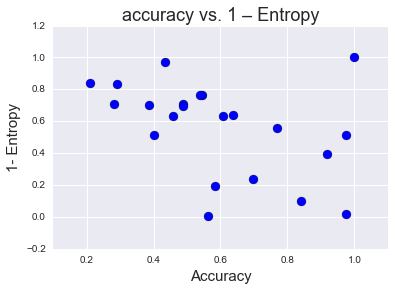

In [395]:
plt.scatter(measurement_info['Accuracy'],measurement_info['1- Entropy'], s=80)
plt.title("accuracy vs. 1 – Entropy", fontsize=18)
plt.xlabel('Accuracy', fontsize=15)
plt.ylabel('1- Entropy', fontsize=15)


plt.grid(True)

plt.show()

# P3 : MUSHROOM NB/DT

# P 3.1 Naive Bayes

In [396]:
#put the features into X (everything except the 0th column)
X_train = pd.DataFrame(train_mushroom, columns=train_mushroom.columns[1:len(train_mushroom.columns)], index=train_mushroom.index)
#put the class values (0th column) into Y 
Y_train = train_mushroom['V1']

In [397]:
#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_train)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y_train = le.transform(Y_train)
#print(y_train)

#have to initialize or get error below
x_train = pd.DataFrame(X_train,columns=[X_train.columns[0]])
#encode each feature column and add it to x_train
for colname in X_train.columns:
    le.fit(X_train[colname])
    #print(colname, le.classes_)
    x_train[colname] = le.transform(X_train[colname])

In [398]:
#put the features into X (everything except the 0th column)
X_test = pd.DataFrame(test_mushroom, columns=test_mushroom.columns[1:len(test_mushroom.columns)], index=test_mushroom.index)
#put the class values (0th column) into Y 
Y_test = test_mushroom['V1']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_test)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y_test = le.transform(Y_test)
#print(y_test)

#have to initialize or get error below
x_test = pd.DataFrame(X_test,columns=[X_test.columns[0]])
#encode each feature column and add it to x_test
for colname in X_test.columns:
    le.fit(X_test[colname])
    #print(colname, le.classes_)
    x_test[colname] = le.transform(X_test[colname])

In [399]:
#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
skgnb = MultinomialNB()
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))


Training accuracy: 0.83104367439
Testing accuracy: 0.825069294734


In [400]:
accuracy_info = pd.DataFrame()
col_names = ['lambda_value','training_accuracy','test_accuracy']
accuracy_info = pd.DataFrame( columns=col_names)

# appending the dataframe is inefficient, so create list of dictionaries and assing 
#the list of dictionary to dataframe out of the loop
accur_list_dict = []

In [401]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
for i in range(0,51):
    skgnb = MultinomialNB(alpha=i)
    skgnb.fit(x_train,y_train)
    train_predict = skgnb.predict(x_train)
    #print(train_predict)

    #see how accurate the training data was fit
    
    #print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))
    train_accur = metrics.accuracy_score(y_train, train_predict)
    #use the trained model to predict the test values
    test_predict = skgnb.predict(x_test)
    #print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))
    test_accur = metrics.accuracy_score(y_test, test_predict)
    
    # preparing the list
    dict_value = [i,test_accur,train_accur]     
    
    accur_list_dict .append(dict(zip(col_names, dict_value)))
    
# Assing the list of dictionary to dataframe
accuracy_info = pd.DataFrame(accur_list_dict )

# P 3.2 Naive Bayes Metrics

In [402]:
accuracy_info

,lambda_value,test_accuracy,training_accuracy
0,0,0.518762,0.516785
1,1,0.831044,0.825069
2,2,0.830634,0.824761
3,3,0.830634,0.824761
4,4,0.830634,0.824761
5,5,0.830634,0.824761
6,6,0.830634,0.824761
7,7,0.830429,0.824453
8,8,0.830429,0.824453
9,9,0.830223,0.824145


# P 3.3 Plot of lambda (x-axis) for Laplacian smoothing against training and test set accuracy

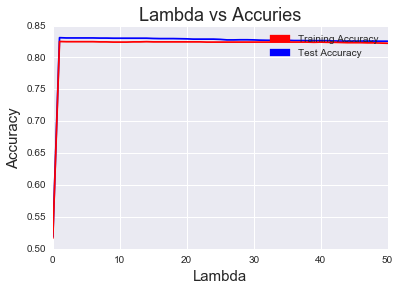

In [403]:
plt.plot(accuracy_info['lambda_value'], accuracy_info['test_accuracy'],color='blue')
plt.plot(accuracy_info['lambda_value'],accuracy_info['training_accuracy'],color='red')

# Legend
red_patch = mpatches.Patch(color='red', label='Training Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Test Accuracy')
plt.legend(handles=[red_patch, blue_patch])

# lables
plt.title("Lambda vs Accuries", fontsize=18)
plt.xlabel('Lambda', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

# P 3.4 Decision Tree

In [404]:
accuracy2_info = pd.DataFrame()
col_names = ['SizeThreshold','training_accuracy','test_accuracy']
accuracy2_info = pd.DataFrame( columns=col_names)

# appending the dataframe is inefficient, so create list of dictionaries and assing 
#the list of dictionary to dataframe out of the loop
accur_list_dict = []

In [405]:
for i in range(4,68,4):

    clf = tree.DecisionTreeClassifier(min_samples_split=i,random_state=99 )
    clf = clf.fit(x_train, y_train)
    train_predict = clf.predict(x_train)

    train_accur = metrics.accuracy_score(y_train, train_predict)
    #print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))
    test_predict = skgnb.predict(x_test)
    #print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))
    test_accur = metrics.accuracy_score(y_test, test_predict)
    
    # preparing the list
    dict_value = [i,test_accur,train_accur]     
    
    accur_list_dict .append(dict(zip(col_names, dict_value)))
    
# Assing the list of dictionary to dataframe
accuracy2_info = pd.DataFrame(accur_list_dict )

# P 3.5 Decision Tree measurements

In [406]:
accuracy2_info

,SizeThreshold,test_accuracy,training_accuracy
0,4,1.000000,0.822298
1,8,1.000000,0.822298
2,12,1.000000,0.822298
3,16,1.000000,0.822298
4,20,1.000000,0.822298
5,24,0.998360,0.822298
6,28,0.995899,0.822298
7,32,0.995899,0.822298
8,36,0.993849,0.822298
9,40,0.993849,0.822298


# P 3.6 Plot of SizeThreshold (x-axis) against training and test set accuracy

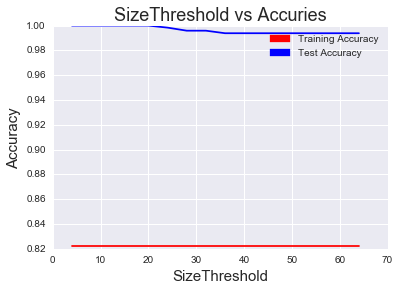

In [407]:
plt.plot(accuracy2_info['SizeThreshold'], accuracy2_info['test_accuracy'],color='blue')
plt.plot(accuracy2_info['SizeThreshold'],accuracy2_info['training_accuracy'],color='red')

# Legend
red_patch = mpatches.Patch(color='red', label='Training Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Test Accuracy')
plt.legend(handles=[red_patch, blue_patch])

# lables
plt.title("SizeThreshold vs Accuries", fontsize=18)
plt.xlabel('SizeThreshold', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

# P 3.7 Comparison of Accuracies

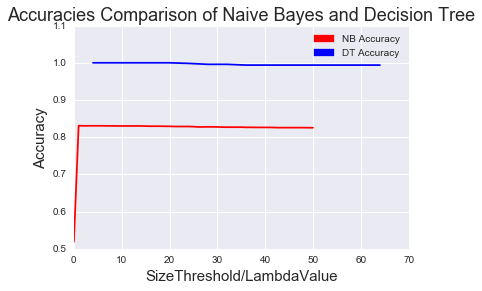

In [408]:
plt.plot(accuracy_info['lambda_value'], accuracy_info['test_accuracy'],color='red')

plt.plot(accuracy2_info['SizeThreshold'], accuracy2_info['test_accuracy'],color='blue')

# Legend
red_patch = mpatches.Patch(color='red', label='NB Accuracy')
blue_patch = mpatches.Patch(color='blue', label='DT Accuracy')
plt.legend(handles=[red_patch, blue_patch])

# lables
plt.title("Accuracies Comparison of Naive Bayes and Decision Tree", fontsize=18)
plt.xlabel('SizeThreshold/LambdaValue', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

# P 3.8 Best Values of Lambda and Size thershold

-->  Lambda         = 2                           

-->  Size Thershold = 24

# P 3.9 Decision Tree @ 30

In [409]:
# @ 30 

clf = tree.DecisionTreeClassifier(min_samples_split=30,random_state=99 )
clf = clf.fit(x_train, y_train)
train_predict = clf.predict(x_train)
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))


Training accuracy: 0.99589911831
Testing accuracy: 0.82229750539


# P 3.10 Decision Tree @ 10

In [410]:
# @ 10 

clf = tree.DecisionTreeClassifier(min_samples_split=10,random_state=99 )
clf = clf.fit(x_train, y_train)
train_predict = clf.predict(x_train)
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))


Training accuracy: 1.0
Testing accuracy: 0.82229750539


# P4 : MNIST Bayesian

# P4.1 : Combined Dataset D0

In [411]:
data_path = "J:/ISB Business Analytics/Data Mining 2/Home Work Datasets 1/MNIST/"
dtr0 = pd.read_csv(data_path + "train0.csv")
dtr1 = pd.read_csv(data_path + "train1.csv")
dtr2 = pd.read_csv(data_path + "train2.csv")
dtr3 = pd.read_csv(data_path + "train3.csv")
dtr4 = pd.read_csv(data_path + "train4.csv")
dtr5 = pd.read_csv(data_path + "train5.csv")
dtr6 = pd.read_csv(data_path + "train6.csv")
dtr7 = pd.read_csv(data_path + "train7.csv")
dtr8 = pd.read_csv(data_path + "train8.csv")
dtr9 = pd.read_csv(data_path + "train9.csv")

dtr0['response'] = 0
dtr1['response'] = 1
dtr2['response'] = 2
dtr3['response'] = 3
dtr4['response'] = 4
dtr5['response'] = 5
dtr6['response'] = 6
dtr7['response'] = 7
dtr8['response'] = 8
dtr9['response'] = 9

dte0 = pd.read_csv(data_path + "test0.csv")
dte1 = pd.read_csv(data_path + "test1.csv")
dte2 = pd.read_csv(data_path + "test2.csv")
dte3 = pd.read_csv(data_path + "test3.csv")
dte4 = pd.read_csv(data_path + "test4.csv")
dte5 = pd.read_csv(data_path + "test5.csv")
dte6 = pd.read_csv(data_path + "test6.csv")
dte7 = pd.read_csv(data_path + "test7.csv")
dte8 = pd.read_csv(data_path + "test8.csv")
dte9 = pd.read_csv(data_path + "test9.csv")

dte0['response'] = 0
dte1['response'] = 1
dte2['response'] = 2
dte3['response'] = 3
dte4['response'] = 4
dte5['response'] = 5
dte6['response'] = 6
dte7['response'] = 7
dte8['response'] = 8
dte9['response'] = 9

frames = [dtr0, dtr1, dtr2,dtr3,dtr4, dtr5,dtr6, dtr7,dtr8,dtr9]
train = pd.concat(frames)

frames = [dte0, dte1, dte2,dte3,dte4, dte5,dte6, dte7,dte8,dte9]
test = pd.concat(frames)

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# P4.2 : 9 dimensional PCA projection - D1 Creation

In [413]:
from sklearn.decomposition import PCA

In [414]:
train.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V776', 'V777', 'V778', 'V779', 'V780', 'V781', 'V782', 'V783', 'V784',
       'response'],
      dtype='object', length=786)

In [415]:
train = train.dropna()

train_dummy = train
train_x =train_dummy.drop('Unnamed: 0', 1)
train_x = train_x.drop('response',1)
train_x = train.values[:,:]
train_y = train['response']
train_y = train_y.values[:]

test = test.dropna()
test_dummy = test
test_x =test_dummy.drop('Unnamed: 0', 1)
test_x = test_x.drop('response',1)
test_x = test.values[:,:]
test_y = test['response']
test_y = test_y.values[:]

In [418]:
# select number of components to extract
pca = PCA(n_components=9)
# fit to the training data
pca.fit(train_x)


PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [419]:
# extract the features
D1_train = pca.fit_transform(train_x)
print(D1_train.shape)
D1_test = pca.fit_transform(test_x)
print(D1_test.shape)

(36025, 9)
(23975, 9)


# P4.3 : 9 dimensional FISHER projection - D2 Creation

In [421]:
#Linear discriminant analysis through scikit learn
sklearn_lda = LDA(n_components=9)
D2_train = sklearn_lda.fit_transform(train_x,train_y)
print(D2_train.shape)
D2_test = sklearn_lda.fit_transform(test_x,test_y)
print(D2_test.shape)

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(36025, 9)
(23975, 9)


# P 4.4 Bayesian Classifier on D1,D2 for Diagonal Covariance matrix

In [423]:
from sklearn.mixture import GaussianMixture

In [430]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(D1_train, train_y)
train_predict = clf.predict(D1_train)
train_accuracy = metrics.accuracy_score(train_y, train_predict)
print("Training D1 Accuracy:", train_accuracy)

clf.fit(D2_test, test_y)
test_predict = clf.predict(D2_test)
test_accuracy = metrics.accuracy_score(test_y, test_predict)
print("Test D2 Accuracy:", test_accuracy)


Training D1 Accuracy: 0.75839000694
Test D2 Accuracy: 0.889426485923


# P 4.5 Bayesian Classifier on D1,D2 for Diagonal Covariance matrix

In [431]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(D1_train, train_y)
train_predict = clf.predict(D1_train)
train_accuracy = metrics.accuracy_score(train_y, train_predict)
print("Train D1 Accuracy:", train_accuracy)

clf.fit(D2_test, test_y)
test_predict = clf.predict(D2_test)
test_accuracy = metrics.accuracy_score(test_y, test_predict)
print("Test D2 Accuracy:", test_accuracy)

Train D1 Accuracy: 0.858431644691
Test D2 Accuracy: 0.90102189781


# P5 : MNIST – kNN / Parzen window

In [365]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [366]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(D1_train)
test_norm = min_max_scaler.fit_transform(D1_test)

In [367]:
accuracy3_info = pd.DataFrame()
col_names = ['K-Value','training_accuracy','test_accuracy']
accuracy3_info = pd.DataFrame( columns=col_names)

# appending the dataframe is inefficient, so create list of dictionaries and assing 
#the list of dictionary to dataframe out of the loop
accur_list_dict = []

In [368]:
for i in range(1,19,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_norm, train_y)
    
    train_predict = knn.predict(train_norm)

    train_accur = metrics.accuracy_score(train_y, train_predict)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(test_norm, test_y)
    
    test_predict = knn.predict(test_norm)

    test_accur = metrics.accuracy_score(test_y, test_predict)
    
    # preparing the list
    dict_value = [i,test_accur,train_accur]     
    
    accur_list_dict .append(dict(zip(col_names, dict_value)))
    
# Assing the list of dictionary to dataframe
accuracy3_info = pd.DataFrame(accur_list_dict )

In [369]:
accuracy3_info

,K-Value,test_accuracy,training_accuracy
0,1,1.000000,1.000000
1,3,0.933185,0.930594
2,5,0.920167,0.918248
3,7,0.912505,0.910031
4,9,0.908452,0.905693
5,11,0.904205,0.903399
6,13,0.900958,0.899270
7,15,0.898348,0.896976
8,17,0.896239,0.895016


In [370]:
train_norm = min_max_scaler.fit_transform(D2_train)
test_norm = min_max_scaler.fit_transform(D2_test)

accuracy4_info = pd.DataFrame()
col_names = ['K-Value','training_accuracy','test_accuracy']
accuracy4_info = pd.DataFrame( columns=col_names)

# appending the dataframe is inefficient, so create list of dictionaries and assing 
#the list of dictionary to dataframe out of the loop
accur_list_dict = []

for i in range(1,19,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_norm, train_y)
    
    train_predict = knn.predict(train_norm)

    train_accur = metrics.accuracy_score(train_y, train_predict)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(test_norm, test_y)
    
    test_predict = knn.predict(test_norm)

    test_accur = metrics.accuracy_score(test_y, test_predict)
    
    # preparing the list
    dict_value = [i,test_accur,train_accur]     
    
    accur_list_dict .append(dict(zip(col_names, dict_value)))
    
# Assing the list of dictionary to dataframe
accuracy4_info = pd.DataFrame(accur_list_dict )

In [371]:
accuracy4_info

,K-Value,test_accuracy,training_accuracy
0,1,1.000000,1.000000
1,3,0.947814,0.948154
2,5,0.937682,0.939145
3,7,0.933574,0.934849
4,9,0.931242,0.931595
5,11,0.928300,0.929009
6,13,0.925996,0.926715
7,15,0.924747,0.925047
8,17,0.923109,0.923712


# P6 : News group Text Classifier

In [432]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:

%load_ext rpy2.ipython

In [ ]:
%%R
library('e1071');
install.packages("NLP")
install.packages("devtools")
install.packages("plyr")
install.packages("ggplot2")
install.packages("wordcloud")
install.packages("RColorBrewer")
install.packages("tm")
install.packages("SnowballC")
library("tm")


alt.atheismtrain<-data.frame(txt=character(800))
alt.atheismtrain$txt<-as.character(alt.atheismtrain$txt)
setwd("C:/ISB CBA/20_newsgroups/alt.atheism")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], alt.atheismtrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


comp.graphicstrain<-data.frame(txt=character(800))
comp.graphicstrain$txt<-as.character(comp.graphicstrain$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.graphics")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], comp.graphicstrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


comp.os.mswindows.misctrain<-data.frame(txt=character(800))
comp.os.mswindows.misctrain$txt<-as.character(comp.os.mswindows.misctrain$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.os.ms-windows.misc")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], comp.os.mswindows.misctrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


comp.sys.ibm.pc.hardwaretrain<-data.frame(txt=character(800))
comp.sys.ibm.pc.hardwaretrain$txt<-as.character(comp.sys.ibm.pc.hardwaretrain$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.sys.ibm.pc.hardware.misc")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], comp.sys.ibm.pc.hardwaretrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}



comp.sys.mac.hardwaretrain<-data.frame(txt=character(800))
comp.sys.mac.hardwaretrain$txt<-as.character(comp.sys.mac.hardwaretrain$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.sys.mac.hardware.misc")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], comp.sys.mac.hardwaretrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}



comp.windows.xtrain<-data.frame(txt=character(800))
comp.windows.xtrain$txt<-as.character(comp.windows.xtrain$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.windows.x")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], comp.windows.xtrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


misc.forsaletrain<-data.frame(txt=character(800))
misc.forsaletrain$txt<-as.character(misc.forsaletrain$txt)
setwd("C:/ISB CBA/20_newsgroups/misc.forsale")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], misc.forsaletrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


rec.autostrain<-data.frame(txt=character(800))
rec.autostrain$txt<-as.character(rec.autostrain$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.autos")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], rec.autostrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


rec.motorcyclestrain<-data.frame(txt=character(800))
rec.motorcyclestrain$txt<-as.character(rec.motorcyclestrain$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.motorcycles")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], rec.motorcyclestrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


rec.sport.baseballtrain<-data.frame(txt=character(800))
rec.sport.baseballtrain$txt<-as.character(rec.sport.baseballtrain$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.sport.baseball")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], rec.sport.baseballtrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


rec.sport.hockeytrain<-data.frame(txt=character(800))
rec.sport.hockeytrain$txt<-as.character(rec.sport.hockeytrain$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.sport.hockey")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], rec.sport.hockeytrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


sci.crypttrain<-data.frame(txt=character(800))
sci.crypttrain$txt<-as.character(sci.crypttrain$txt)
setwd("C:/ISB CBA/20_newsgroups/sci.crypt")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], sci.crypttrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


sci.electronicstrain<-data.frame(txt=character(800))
sci.electronicstrain$txt<-as.character(sci.crypttrain$txt)
setwd("C:/ISB CBA/sci.electronics/sci.crypt")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], sci.electronicstrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}



sci.medtrain<-data.frame(txt=character(800))
sci.medtrain$txt<-as.character(sci.medtrain$txt)
setwd("C:/ISB CBA/sci.med/sci.crypt")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], sci.medtrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


sci.spacetrain<-data.frame(txt=character(800))
sci.spacetrain$txt<-as.character(sci.spacetrain$txt)
setwd("C:/ISB CBA/sci.med/sci.space")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], sci.spacetrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}



soc.religion.christiantrain<-data.frame(txt=character(800))
soc.religion.christiantrain$txt<-as.character(soc.religion.christiantrain$txt)
setwd("C:/ISB CBA/sci.med/soc.religion.christian")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], soc.religion.christiantrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


talk.politics.gunstrain<-data.frame(txt=character(800))
talk.politics.gunstrain$txt<-as.character(talk.politics.gunstrain$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.guns")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], talk.politics.gunstrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


talk.politics.mideasttrain<-data.frame(txt=character(800))
talk.politics.mideasttrain$txt<-as.character(talk.politics.mideasttrain$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.mideast")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], talk.politics.mideasttrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


talk.politics.misctrain<-data.frame(txt=character(800))
talk.politics.misctrain$txt<-as.character(talk.politics.misctrain$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.misc")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], talk.politics.misctrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


talk.religion.misctrain<-data.frame(txt=character(800))
talk.religion.misctrain$txt<-as.character(talk.religion.misctrain$txt)
setwd("C:/ISB CBA/sci.med/talk.religion.misc")
temp = list.files()

for (i in 1:800) {
  assign(temp[i], talk.religion.misctrain$txt[i]<-paste(readLines(temp[i]), collapse = " " ))
}


alt.atheismtest<-data.frame(txt=character(200))
alt.atheismtest$txt<-as.character(alt.atheismtest$txt)
setwd("C:/ISB CBA/20_newsgroups/alt.atheism")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], alt.atheismtest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


comp.graphicstest<-data.frame(txt=character(200))
comp.graphicstest$txt<-as.character(comp.graphicstest$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.graphics")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], comp.graphicstest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


comp.os.mswindows.misctest<-data.frame(txt=character(200))
comp.os.mswindows.misctest$txt<-as.character(comp.os.mswindows.misctest$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.os.ms-windows.misc")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], comp.os.mswindows.misctest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


comp.sys.ibm.pc.hardwaretest<-data.frame(txt=character(200))
comp.sys.ibm.pc.hardwaretest$txt<-as.character(comp.sys.ibm.pc.hardwaretest$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.sys.ibm.pc.hardware.misc")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], comp.sys.ibm.pc.hardwaretest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}



comp.sys.mac.hardwaretest<-data.frame(txt=character(200))
comp.sys.mac.hardwaretest$txt<-as.character(comp.sys.mac.hardwaretest$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.sys.mac.hardware.misc")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], comp.sys.mac.hardwaretest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}



comp.windows.xtest<-data.frame(txt=character(200))
comp.windows.xtest$txt<-as.character(comp.windows.xtest$txt)
setwd("C:/ISB CBA/20_newsgroups/comp.windows.x")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], comp.windows.xtest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


misc.forsaletest<-data.frame(txt=character(200))
misc.forsaletest$txt<-as.character(misc.forsaletest$txt)
setwd("C:/ISB CBA/20_newsgroups/misc.forsale")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], misc.forsaletest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


rec.autostest<-data.frame(txt=character(200))
rec.autostest$txt<-as.character(rec.autostest$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.autos")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], rec.autostest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


rec.motorcyclestest<-data.frame(txt=character(200))
rec.motorcyclestest$txt<-as.character(rec.motorcyclestest$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.motorcycles")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], rec.motorcyclestest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


rec.sport.baseballtest<-data.frame(txt=character(200))
rec.sport.baseballtest$txt<-as.character(rec.sport.baseballtest$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.sport.baseball")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], rec.sport.baseballtest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


rec.sport.hockeytest<-data.frame(txt=character(200))
rec.sport.hockeytest$txt<-as.character(rec.sport.hockeytest$txt)
setwd("C:/ISB CBA/20_newsgroups/rec.sport.hockey")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], rec.sport.hockeytest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


sci.crypttest<-data.frame(txt=character(200))
sci.crypttest$txt<-as.character(sci.crypttest$txt)
setwd("C:/ISB CBA/20_newsgroups/sci.crypt")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], sci.crypttest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


sci.electronicstest<-data.frame(txt=character(200))
sci.electronicstest$txt<-as.character(sci.crypttest$txt)
setwd("C:/ISB CBA/sci.electronics/sci.crypt")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], sci.electronicstest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}



sci.medtest<-data.frame(txt=character(200))
sci.medtest$txt<-as.character(sci.medtest$txt)
setwd("C:/ISB CBA/sci.med/sci.crypt")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], sci.medtest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


sci.spacetest<-data.frame(txt=character(200))
sci.spacetest$txt<-as.character(sci.spacetest$txt)
setwd("C:/ISB CBA/sci.med/sci.space")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], sci.spacetest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}



soc.religion.christiantest<-data.frame(txt=character(200))
soc.religion.christiantest$txt<-as.character(soc.religion.christiantest$txt)
setwd("C:/ISB CBA/sci.med/soc.religion.christian")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], soc.religion.christiantest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


talk.politics.gunstest<-data.frame(txt=character(200))
talk.politics.gunstest$txt<-as.character(talk.politics.gunstest$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.guns")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], talk.politics.gunstest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


talk.politics.mideasttest<-data.frame(txt=character(200))
talk.politics.mideasttest$txt<-as.character(talk.politics.mideasttest$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.mideast")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], talk.politics.mideasttest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


talk.politics.misctest<-data.frame(txt=character(200))
talk.politics.misctest$txt<-as.character(talk.politics.misctest$txt)
setwd("C:/ISB CBA/sci.med/talk.politics.misc")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], talk.politics.misctest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


talk.religion.misctest<-data.frame(txt=character(200))
talk.religion.misctest$txt<-as.character(talk.religion.misctest$txt)
setwd("C:/ISB CBA/sci.med/talk.religion.misc")
temp = list.files()

for (i in 1:200) {
  assign(temp[800+i], talk.religion.misctest$txt[i]<-paste(readLines(temp[800+i]), collapse = " " ))
}


alt.atheismtrain = gsub("[[:punct:]]", "", alt.atheismtrain)
alt.atheismtrain = gsub("[[:digit:]]", "", alt.atheismtrain)
alt.atheismtrain = gsub("http\\w+", "", alt.atheismtrain)
alt.atheismtrain = gsub("[ \t]{2,}", "", alt.atheismtrain)
alt.atheismtrain = gsub("^\\s+|\\s+$", "", alt.atheismtrain)


comp.graphicstrain = gsub("[[:punct:]]", "", comp.graphicstrain)
comp.graphicstrain = gsub("[[:digit:]]", "", comp.graphicstrain)
comp.graphicstrain = gsub("http\\w+", "", comp.graphicstrain)
comp.graphicstrain = gsub("[ \t]{2,}", "", comp.graphicstrain)
comp.graphicstrain = gsub("^\\s+|\\s+$", "", comp.graphicstrain)


comp.os.mswindows.misctrain = gsub("[[:punct:]]", "", comp.os.mswindows.misctrain)
comp.os.mswindows.misctrain = gsub("[[:digit:]]", "", comp.os.mswindows.misctrain)
comp.os.mswindows.misctrain = gsub("http\\w+", "", comp.os.mswindows.misctrain)
comp.os.mswindows.misctrain = gsub("[ \t]{2,}", "", comp.os.mswindows.misctrain)
comp.os.mswindows.misctrain = gsub("^\\s+|\\s+$", "", comp.os.mswindows.misctrain)


comp.sys.ibm.pc.hardwaretrain = gsub("[[:punct:]]", "", comp.sys.ibm.pc.hardwaretrain)
comp.sys.ibm.pc.hardwaretrain = gsub("[[:digit:]]", "", comp.sys.ibm.pc.hardwaretrain)
comp.sys.ibm.pc.hardwaretrain = gsub("http\\w+", "", comp.sys.ibm.pc.hardwaretrain)
comp.sys.ibm.pc.hardwaretrain = gsub("[ \t]{2,}", "", comp.sys.ibm.pc.hardwaretrain)
comp.sys.ibm.pc.hardwaretrain = gsub("^\\s+|\\s+$", "", comp.sys.ibm.pc.hardwaretrain)


comp.sys.mac.hardwaretrain = gsub("[[:punct:]]", "", comp.sys.mac.hardwaretrain)
comp.sys.mac.hardwaretrain = gsub("[[:digit:]]", "", comp.sys.mac.hardwaretrain)
comp.sys.mac.hardwaretrain = gsub("http\\w+", "", comp.sys.mac.hardwaretrain)
comp.sys.mac.hardwaretrain = gsub("[ \t]{2,}", "", comp.sys.mac.hardwaretrain)
comp.sys.mac.hardwaretrain = gsub("^\\s+|\\s+$", "", comp.sys.mac.hardwaretrain)


comp.windows.xtrain = gsub("[[:punct:]]", "", comp.windows.xtrain)
comp.windows.xtrain = gsub("[[:digit:]]", "", comp.windows.xtrain)
comp.windows.xtrain = gsub("http\\w+", "", comp.windows.xtrain)
comp.windows.xtrain = gsub("[ \t]{2,}", "", comp.windows.xtrain)
comp.windows.xtrain = gsub("^\\s+|\\s+$", "", comp.windows.xtrain)


misc.forsaletrain = gsub("[[:punct:]]", "", misc.forsaletrain)
misc.forsaletrain = gsub("[[:digit:]]", "", misc.forsaletrain)
misc.forsaletrain = gsub("http\\w+", "", misc.forsaletrain)
misc.forsaletrain = gsub("[ \t]{2,}", "", misc.forsaletrain)
misc.forsaletrain = gsub("^\\s+|\\s+$", "", misc.forsaletrain)


rec.autostrain = gsub("[[:punct:]]", "", rec.autostrain)
rec.autostrain = gsub("[[:digit:]]", "", rec.autostrain)
rec.autostrain = gsub("http\\w+", "", rec.autostrain)
rec.autostrain = gsub("[ \t]{2,}", "", rec.autostrain)
rec.autostrain = gsub("^\\s+|\\s+$", "", rec.autostrain)



rec.motorcyclestrain = gsub("[[:punct:]]", "", rec.motorcyclestrain)
rec.motorcyclestrain = gsub("[[:digit:]]", "", rec.motorcyclestrain)
rec.motorcyclestrain = gsub("http\\w+", "", rec.motorcyclestrain)
rec.motorcyclestrain = gsub("[ \t]{2,}", "", rec.motorcyclestrain)
rec.motorcyclestrain = gsub("^\\s+|\\s+$", "", rec.motorcyclestrain)



rec.sport.baseballtrain = gsub("[[:punct:]]", "", rec.sport.baseballtrain)
rec.sport.baseballtrain = gsub("[[:digit:]]", "", rec.sport.baseballtrain)
rec.sport.baseballtrain = gsub("http\\w+", "", rec.sport.baseballtrain)
rec.sport.baseballtrain = gsub("[ \t]{2,}", "", rec.sport.baseballtrain)
rec.sport.baseballtrain = gsub("^\\s+|\\s+$", "", rec.sport.baseballtrain)


rec.sport.hockeytrain = gsub("[[:punct:]]", "", rec.sport.hockeytrain)
rec.sport.hockeytrain = gsub("[[:digit:]]", "", rec.sport.hockeytrain)
rec.sport.hockeytrain = gsub("http\\w+", "", rec.sport.hockeytrain)
rec.sport.hockeytrain = gsub("[ \t]{2,}", "", rec.sport.hockeytrain)
rec.sport.hockeytrain = gsub("^\\s+|\\s+$", "", rec.sport.hockeytrain)

sci.crypttrain = gsub("[[:punct:]]", "", sci.crypttrain)
sci.crypttrain = gsub("[[:digit:]]", "", sci.crypttrain)
sci.crypttrain = gsub("http\\w+", "", sci.crypttrain)
sci.crypttrain = gsub("[ \t]{2,}", "", sci.crypttrain)
sci.crypttrain = gsub("^\\s+|\\s+$", "", sci.crypttrain)


sci.electronicstrain = gsub("[[:punct:]]", "", sci.electronicstrain)
sci.electronicstrain = gsub("[[:digit:]]", "", sci.electronicstrain)
sci.electronicstrain = gsub("http\\w+", "", sci.electronicstrain)
sci.electronicstrain = gsub("[ \t]{2,}", "", sci.electronicstrain)
sci.electronicstrain = gsub("^\\s+|\\s+$", "", sci.electronicstrain)


sci.medtrain = gsub("[[:punct:]]", "", sci.medtrain)
sci.medtrain = gsub("[[:digit:]]", "", sci.medtrain)
sci.medtrain = gsub("http\\w+", "", sci.medtrain)
sci.medtrain = gsub("[ \t]{2,}", "", sci.medtrain)
sci.medtrain = gsub("^\\s+|\\s+$", "", sci.medtrain)


sci.spacetrain = gsub("[[:punct:]]", "", sci.spacetrain)
sci.spacetrain = gsub("[[:digit:]]", "", sci.spacetrain)
sci.spacetrain = gsub("http\\w+", "", sci.spacetrain)
sci.spacetrain = gsub("[ \t]{2,}", "", sci.spacetrain)
sci.spacetrain = gsub("^\\s+|\\s+$", "", sci.spacetrain)


soc.religion.christiantrain = gsub("[[:punct:]]", "", soc.religion.christiantrain)
soc.religion.christiantrain = gsub("[[:digit:]]", "", soc.religion.christiantrain)
soc.religion.christiantrain = gsub("http\\w+", "", soc.religion.christiantrain)
soc.religion.christiantrain = gsub("[ \t]{2,}", "", soc.religion.christiantrain)
soc.religion.christiantrain = gsub("^\\s+|\\s+$", "", soc.religion.christiantrain)

talk.politics.gunstrain = gsub("[[:punct:]]", "", talk.politics.gunstrain)
talk.politics.gunstrain = gsub("[[:digit:]]", "", talk.politics.gunstrain)
talk.politics.gunstrain = gsub("http\\w+", "", talk.politics.gunstrain)
talk.politics.gunstrain = gsub("[ \t]{2,}", "", talk.politics.gunstrain)
talk.politics.gunstrain = gsub("^\\s+|\\s+$", "", talk.politics.gunstrain)

talk.politics.mideasttrain = gsub("[[:punct:]]", "", talk.politics.mideasttrain)
talk.politics.mideasttrain = gsub("[[:digit:]]", "", talk.politics.mideasttrain)
talk.politics.mideasttrain = gsub("http\\w+", "", talk.politics.mideasttrain)
talk.politics.mideasttrain = gsub("[ \t]{2,}", "", talk.politics.mideasttrain)
talk.politics.mideasttrain = gsub("^\\s+|\\s+$", "", talk.politics.mideasttrain)

talk.politics.misctrain = gsub("[[:punct:]]", "", talk.politics.misctrain)
talk.politics.misctrain = gsub("[[:digit:]]", "", talk.politics.misctrain)
talk.politics.misctrain = gsub("http\\w+", "", talk.politics.misctrain)
talk.politics.misctrain = gsub("[ \t]{2,}", "", talk.politics.misctrain)
talk.politics.misctrain = gsub("^\\s+|\\s+$", "", talk.politics.misctrain)

talk.religion.misctrain = gsub("[[:punct:]]", "", talk.religion.misctrain)
talk.religion.misctrain = gsub("[[:digit:]]", "", talk.religion.misctrain)
talk.religion.misctrain = gsub("http\\w+", "", talk.religion.misctrain)
talk.religion.misctrain = gsub("[ \t]{2,}", "", talk.religion.misctrain)
talk.religion.misctrain = gsub("^\\s+|\\s+$", "", talk.religion.misctrain)


alt.atheismtest = gsub("[[:punct:]]", "", alt.atheismtest)
alt.atheismtest = gsub("[[:digit:]]", "", alt.atheismtest)
alt.atheismtest = gsub("http\\w+", "", alt.atheismtest)
alt.atheismtest = gsub("[ \t]{2,}", "", alt.atheismtest)
alt.atheismtest = gsub("^\\s+|\\s+$", "", alt.atheismtest)


comp.graphicstest = gsub("[[:punct:]]", "", comp.graphicstest)
comp.graphicstest = gsub("[[:digit:]]", "", comp.graphicstest)
comp.graphicstest = gsub("http\\w+", "", comp.graphicstest)
comp.graphicstest = gsub("[ \t]{2,}", "", comp.graphicstest)
comp.graphicstest = gsub("^\\s+|\\s+$", "", comp.graphicstest)


comp.os.mswindows.misctest = gsub("[[:punct:]]", "", comp.os.mswindows.misctest)
comp.os.mswindows.misctest = gsub("[[:digit:]]", "", comp.os.mswindows.misctest)
comp.os.mswindows.misctest = gsub("http\\w+", "", comp.os.mswindows.misctest)
comp.os.mswindows.misctest = gsub("[ \t]{2,}", "", comp.os.mswindows.misctest)
comp.os.mswindows.misctest = gsub("^\\s+|\\s+$", "", comp.os.mswindows.misctest)


comp.sys.ibm.pc.hardwaretest = gsub("[[:punct:]]", "", comp.sys.ibm.pc.hardwaretest)
comp.sys.ibm.pc.hardwaretest = gsub("[[:digit:]]", "", comp.sys.ibm.pc.hardwaretest)
comp.sys.ibm.pc.hardwaretest = gsub("http\\w+", "", comp.sys.ibm.pc.hardwaretest)
comp.sys.ibm.pc.hardwaretest = gsub("[ \t]{2,}", "", comp.sys.ibm.pc.hardwaretest)
comp.sys.ibm.pc.hardwaretest = gsub("^\\s+|\\s+$", "", comp.sys.ibm.pc.hardwaretest)


comp.sys.mac.hardwaretest = gsub("[[:punct:]]", "", comp.sys.mac.hardwaretest)
comp.sys.mac.hardwaretest = gsub("[[:digit:]]", "", comp.sys.mac.hardwaretest)
comp.sys.mac.hardwaretest = gsub("http\\w+", "", comp.sys.mac.hardwaretest)
comp.sys.mac.hardwaretest = gsub("[ \t]{2,}", "", comp.sys.mac.hardwaretest)
comp.sys.mac.hardwaretest = gsub("^\\s+|\\s+$", "", comp.sys.mac.hardwaretest)


comp.windows.xtest = gsub("[[:punct:]]", "", comp.windows.xtest)
comp.windows.xtest = gsub("[[:digit:]]", "", comp.windows.xtest)
comp.windows.xtest = gsub("http\\w+", "", comp.windows.xtest)
comp.windows.xtest = gsub("[ \t]{2,}", "", comp.windows.xtest)
comp.windows.xtest = gsub("^\\s+|\\s+$", "", comp.windows.xtest)


misc.forsaletest = gsub("[[:punct:]]", "", misc.forsaletest)
misc.forsaletest = gsub("[[:digit:]]", "", misc.forsaletest)
misc.forsaletest = gsub("http\\w+", "", misc.forsaletest)
misc.forsaletest = gsub("[ \t]{2,}", "", misc.forsaletest)
misc.forsaletest = gsub("^\\s+|\\s+$", "", misc.forsaletest)


rec.autostest = gsub("[[:punct:]]", "", rec.autostest)
rec.autostest = gsub("[[:digit:]]", "", rec.autostest)
rec.autostest = gsub("http\\w+", "", rec.autostest)
rec.autostest = gsub("[ \t]{2,}", "", rec.autostest)
rec.autostest = gsub("^\\s+|\\s+$", "", rec.autostest)



rec.motorcyclestest = gsub("[[:punct:]]", "", rec.motorcyclestest)
rec.motorcyclestest = gsub("[[:digit:]]", "", rec.motorcyclestest)
rec.motorcyclestest = gsub("http\\w+", "", rec.motorcyclestest)
rec.motorcyclestest = gsub("[ \t]{2,}", "", rec.motorcyclestest)
rec.motorcyclestest = gsub("^\\s+|\\s+$", "", rec.motorcyclestest)



rec.sport.baseballtest = gsub("[[:punct:]]", "", rec.sport.baseballtest)
rec.sport.baseballtest = gsub("[[:digit:]]", "", rec.sport.baseballtest)
rec.sport.baseballtest = gsub("http\\w+", "", rec.sport.baseballtest)
rec.sport.baseballtest = gsub("[ \t]{2,}", "", rec.sport.baseballtest)
rec.sport.baseballtest = gsub("^\\s+|\\s+$", "", rec.sport.baseballtest)


rec.sport.hockeytest = gsub("[[:punct:]]", "", rec.sport.hockeytest)
rec.sport.hockeytest = gsub("[[:digit:]]", "", rec.sport.hockeytest)
rec.sport.hockeytest = gsub("http\\w+", "", rec.sport.hockeytest)
rec.sport.hockeytest = gsub("[ \t]{2,}", "", rec.sport.hockeytest)
rec.sport.hockeytest = gsub("^\\s+|\\s+$", "", rec.sport.hockeytest)

sci.crypttest = gsub("[[:punct:]]", "", sci.crypttest)
sci.crypttest = gsub("[[:digit:]]", "", sci.crypttest)
sci.crypttest = gsub("http\\w+", "", sci.crypttest)
sci.crypttest = gsub("[ \t]{2,}", "", sci.crypttest)
sci.crypttest = gsub("^\\s+|\\s+$", "", sci.crypttest)


sci.electronicstest = gsub("[[:punct:]]", "", sci.electronicstest)
sci.electronicstest = gsub("[[:digit:]]", "", sci.electronicstest)
sci.electronicstest = gsub("http\\w+", "", sci.electronicstest)
sci.electronicstest = gsub("[ \t]{2,}", "", sci.electronicstest)
sci.electronicstest = gsub("^\\s+|\\s+$", "", sci.electronicstest)


sci.medtest = gsub("[[:punct:]]", "", sci.medtest)
sci.medtest = gsub("[[:digit:]]", "", sci.medtest)
sci.medtest = gsub("http\\w+", "", sci.medtest)
sci.medtest = gsub("[ \t]{2,}", "", sci.medtest)
sci.medtest = gsub("^\\s+|\\s+$", "", sci.medtest)


sci.spacetest = gsub("[[:punct:]]", "", sci.spacetest)
sci.spacetest = gsub("[[:digit:]]", "", sci.spacetest)
sci.spacetest = gsub("http\\w+", "", sci.spacetest)
sci.spacetest = gsub("[ \t]{2,}", "", sci.spacetest)
sci.spacetest = gsub("^\\s+|\\s+$", "", sci.spacetest)


soc.religion.christiantest = gsub("[[:punct:]]", "", soc.religion.christiantest)
soc.religion.christiantest = gsub("[[:digit:]]", "", soc.religion.christiantest)
soc.religion.christiantest = gsub("http\\w+", "", soc.religion.christiantest)
soc.religion.christiantest = gsub("[ \t]{2,}", "", soc.religion.christiantest)
soc.religion.christiantest = gsub("^\\s+|\\s+$", "", soc.religion.christiantest)

talk.politics.gunstest = gsub("[[:punct:]]", "", talk.politics.gunstest)
talk.politics.gunstest = gsub("[[:digit:]]", "", talk.politics.gunstest)
talk.politics.gunstest = gsub("http\\w+", "", talk.politics.gunstest)
talk.politics.gunstest = gsub("[ \t]{2,}", "", talk.politics.gunstest)
talk.politics.gunstest = gsub("^\\s+|\\s+$", "", talk.politics.gunstest)

talk.politics.mideasttest = gsub("[[:punct:]]", "", talk.politics.mideasttest)
talk.politics.mideasttest = gsub("[[:digit:]]", "", talk.politics.mideasttest)
talk.politics.mideasttest = gsub("http\\w+", "", talk.politics.mideasttest)
talk.politics.mideasttest = gsub("[ \t]{2,}", "", talk.politics.mideasttest)
talk.politics.mideasttest = gsub("^\\s+|\\s+$", "", talk.politics.mideasttest)

talk.politics.misctest = gsub("[[:punct:]]", "", talk.politics.misctest)
talk.politics.misctest = gsub("[[:digit:]]", "", talk.politics.misctest)
talk.politics.misctest = gsub("http\\w+", "", talk.politics.misctest)
talk.politics.misctest = gsub("[ \t]{2,}", "", talk.politics.misctest)
talk.politics.misctest = gsub("^\\s+|\\s+$", "", talk.politics.misctest)

talk.religion.misctest = gsub("[[:punct:]]", "", talk.religion.misctest)
talk.religion.misctest = gsub("[[:digit:]]", "", talk.religion.misctest)
talk.religion.misctest = gsub("http\\w+", "", talk.religion.misctest)
talk.religion.misctest = gsub("[ \t]{2,}", "", talk.religion.misctest)
talk.religion.misctest = gsub("^\\s+|\\s+$", "", talk.religion.misctest)

docfinaltrain<-as.data.frame(c(alt.atheismtrain, comp.graphicstrain, comp.os.mswindows.misctrain, comp.sys.ibm.pc.hardwaretrain,
                comp.sys.mac.hardwaretrain, comp.windows.xtrain, misc.forsaletrain, rec.autostrain, 
                rec.motorcyclestrain, rec.sport.baseballtrain, rec.sport.hockeytrain, sci.crypttrain,
                sci.electronicstrain, sci.medtrain, sci.spacetrain, soc.religion.christiantrain, 
                talk.politics.gunstrain, talk.politics.mideasttrain, talk.politics.misctrain, 
                talk.religion.misctrain))
colnames(docfinaltrain)<-"txt"

docfinaltest<-as.data.frame(c(alt.atheismtest, comp.graphicstest, comp.os.mswindows.misctest, comp.sys.ibm.pc.hardwaretest,
                comp.sys.mac.hardwaretest, comp.windows.xtest, misc.forsaletest, rec.autostest, 
                rec.motorcyclestest, rec.sport.baseballtest, rec.sport.hockeytest, sci.crypttest,
                sci.electronicstest, sci.medtest, sci.spacetest, soc.religion.christiantest, 
                talk.politics.gunstest, talk.politics.mideasttest, talk.politics.misctest, 
                talk.religion.misctest))

colnames(docfinaltest)<-"txt"


docfinaltrainvector <- VectorSource(docfinaltrain)
doctraincorpus <- Corpus(docfinaltrainvector)
doctraincorpus<-tm_map(doctraincorpus, removeWords, stopwords('english'))

docfinaltestvector <- VectorSource(docfinaltest)
doctestcorpus <- Corpus(docfinaltestvector)
doctestcorpus<-tm_map(doctestcorpus, removeWords, stopwords('english'))

TDMtrain <- t(TermDocumentMatrix(doctraincorpus))
TDMtest <- t(TermDocumentMatrix(doctestcorpus))


mTrain <- as.matrix(TDMtrain)
vTrain <- sort(rowSums(mTrain), decreasing=TRUE)
DTMtop5000<-head(vTrain, 5000)
DTMtop10000<-head(vTrain, 10000)

mtest <- as.matrix(TDMtest)
vtest <- sort(rowSums(mtest), decreasing=TRUE)
DTMtop5000<-head(vtest, 5000)
DTMtop10000<-head(vtest, 10000)
anyNA(docfinaltrain$txt)

model <- naiveBayes(as.matrix(TDMtrain),as.factor(docfinaltrain$txt), laplace = 30);

results <- predict(model, as.matrix(TDMtest))